In [45]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('unicorns.csv')


In [10]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [12]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '').astype(float)


<ipython-input-12-314a14005e82>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '').astype(float)


In [13]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [17]:
investors_list = df['Select Investors'].dropna().str.split(', ').sum() # Split and flatten
investors_count = Counter(investors_list)

In [30]:
df['Unique Investor Count'] = df['Select Investors'].dropna().str.split(', ').apply(lambda x: len(set(x)))
#this doesn't say much as mostly values are 3 and 4 , To make use of this column lets find
#the most repeated investors then will have graph to see how their value changes

In [32]:
sorted_investors_count = sorted(investors_count.items(), key=lambda item: item[1], reverse=True)
sorted_investors_df = pd.DataFrame(sorted_investors_count, columns=['Investor', 'Count'])


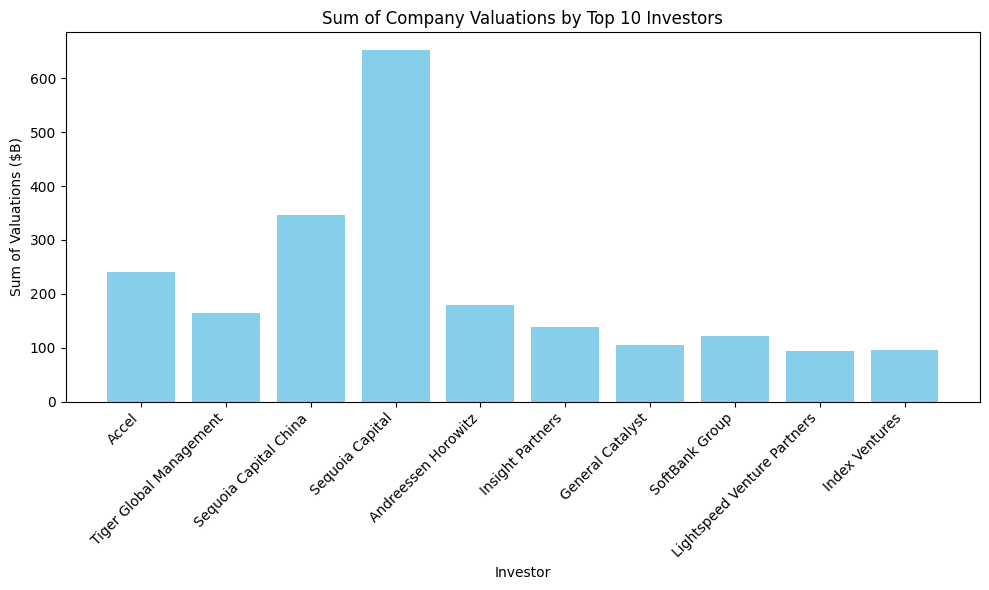

In [35]:
top_10_investors = sorted_investors_df.head(10)['Investor']

valuation_sums = []
for investor in top_10_investors:
    filtered_df = df[df['Select Investors'].str.contains(investor, na=False)]
    valuation_sum = filtered_df['Valuation ($B)'].sum()
    valuation_sums.append(valuation_sum)

plt.figure(figsize=(10, 6))
plt.bar(top_10_investors, valuation_sums, color='skyblue')
plt.xlabel('Investor')
plt.ylabel('Sum of Valuations ($B)')
plt.title('Sum of Company Valuations by Top 10 Investors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
# To make most of this graph lets also plot number of companies these investors invested in and compare their valuations

In [ ]:
# Step 1: Re-identifying the top 10 most active investors directly from the data
investors_flat_list = [investor for sublist in df['Select Investors'].dropna().str.split(', ') for investor in sublist]
investors_count_direct = Counter(investors_flat_list)
sorted_investors_count_direct = sorted(investors_count_direct.items(), key=lambda item: item[1], reverse=True)[:10]

# Preparing for the plots
top_10_investors_names = [item[0] for item in sorted_investors_count_direct]
top_10_investors_counts = [item[1] for item in sorted_investors_count_direct]

# Calculating the total valuation of the companies each of these investors has invested in
top_10_valuations = []
for investor in top_10_investors_names:
    investor_companies = df[df['Select Investors'].str.contains(investor, na=False)]
    total_valuation = investor_companies['Valuation ($B)'].sum()
    top_10_valuations.append(total_valuation)


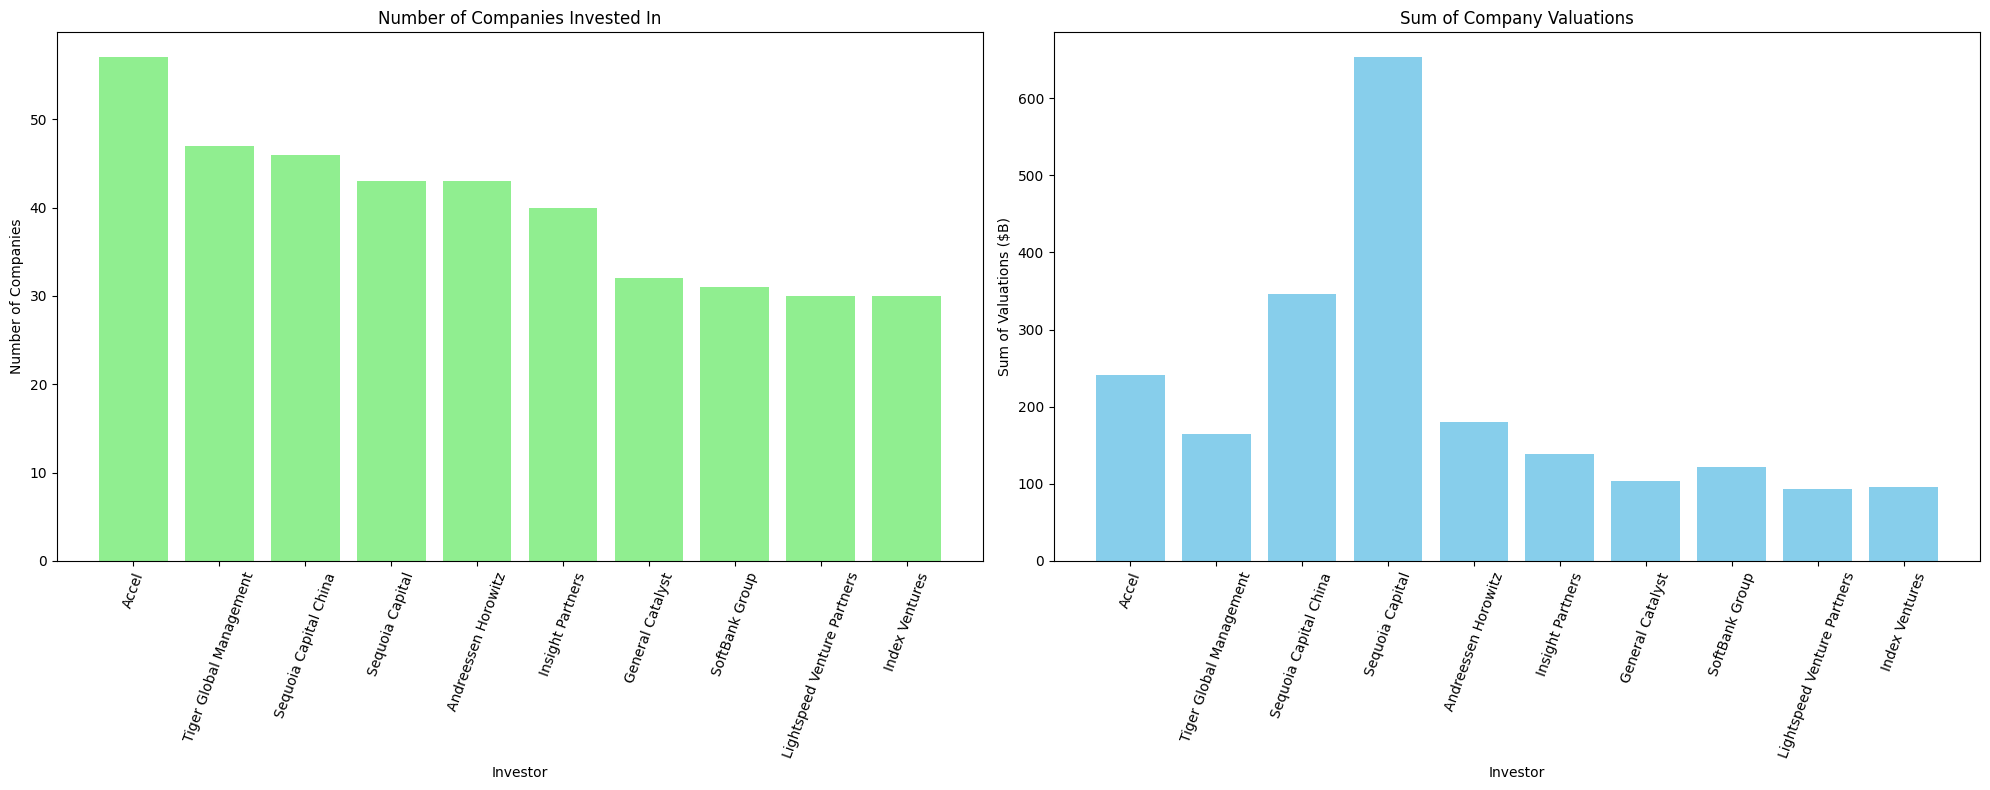

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].bar(top_10_investors_names, top_10_investors_counts, color='lightgreen')
axs[0].set_title('Number of Companies Invested In')
axs[0].set_xlabel('Investor')
axs[0].set_ylabel('Number of Companies')
axs[0].tick_params(axis='x', rotation=70)


axs[1].bar(top_10_investors_names, top_10_valuations, color='skyblue')
axs[1].set_title('Sum of Company Valuations')
axs[1].set_xlabel('Investor')
axs[1].set_ylabel('Sum of Valuations ($B)')
axs[1].tick_params(axis='x', rotation=70)

plt.tight_layout()
plt.show()

In [44]:
#From the plot above it is obvious that investors are either lucky or are really smart :)

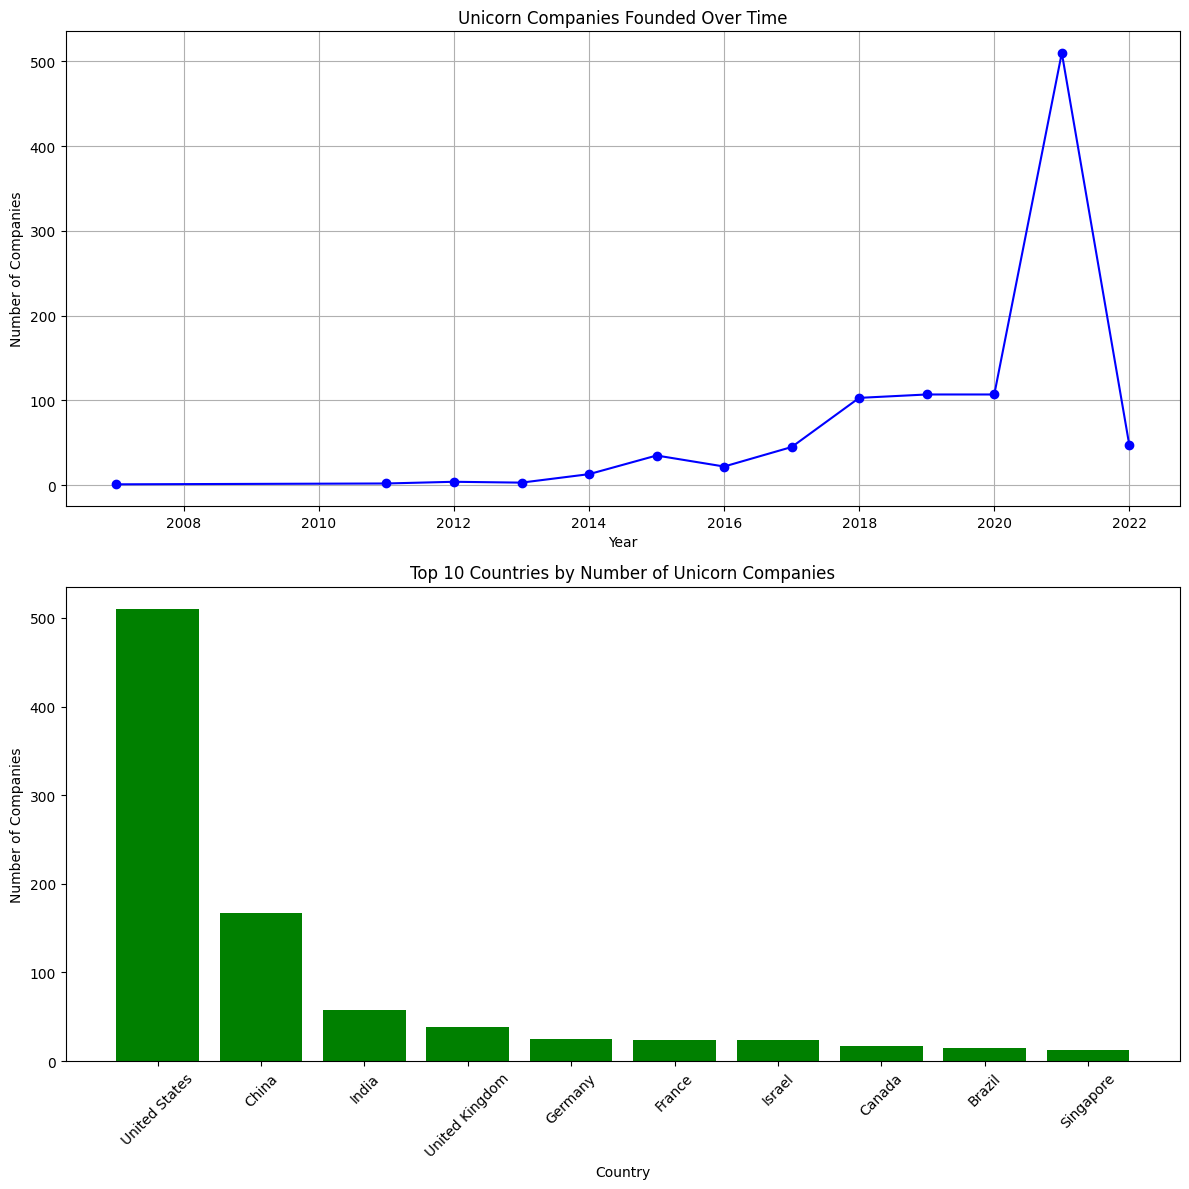

In [49]:
df['Year Joined'] = df['Date Joined'].dt.year
unicorns_per_year = df['Year Joined'].value_counts().sort_index()

unicorns_per_country = df['Country'].value_counts().head(10)  # Top 10 countries for simplicity

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].plot(unicorns_per_year.index, unicorns_per_year.values, marker='o', linestyle='-', color='b')
axs[0].set_title('Unicorn Companies Founded Over Time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Companies')
axs[0].grid(True)

axs[1].bar(unicorns_per_country.index, unicorns_per_country.values, color='green')
axs[1].set_title('Top 10 Countries by Number of Unicorn Companies')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Number of Companies')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [50]:
#Ofcourse we that USA leads the board of the countries that have unicorn companies and a lot companies have been founded 2020=2022

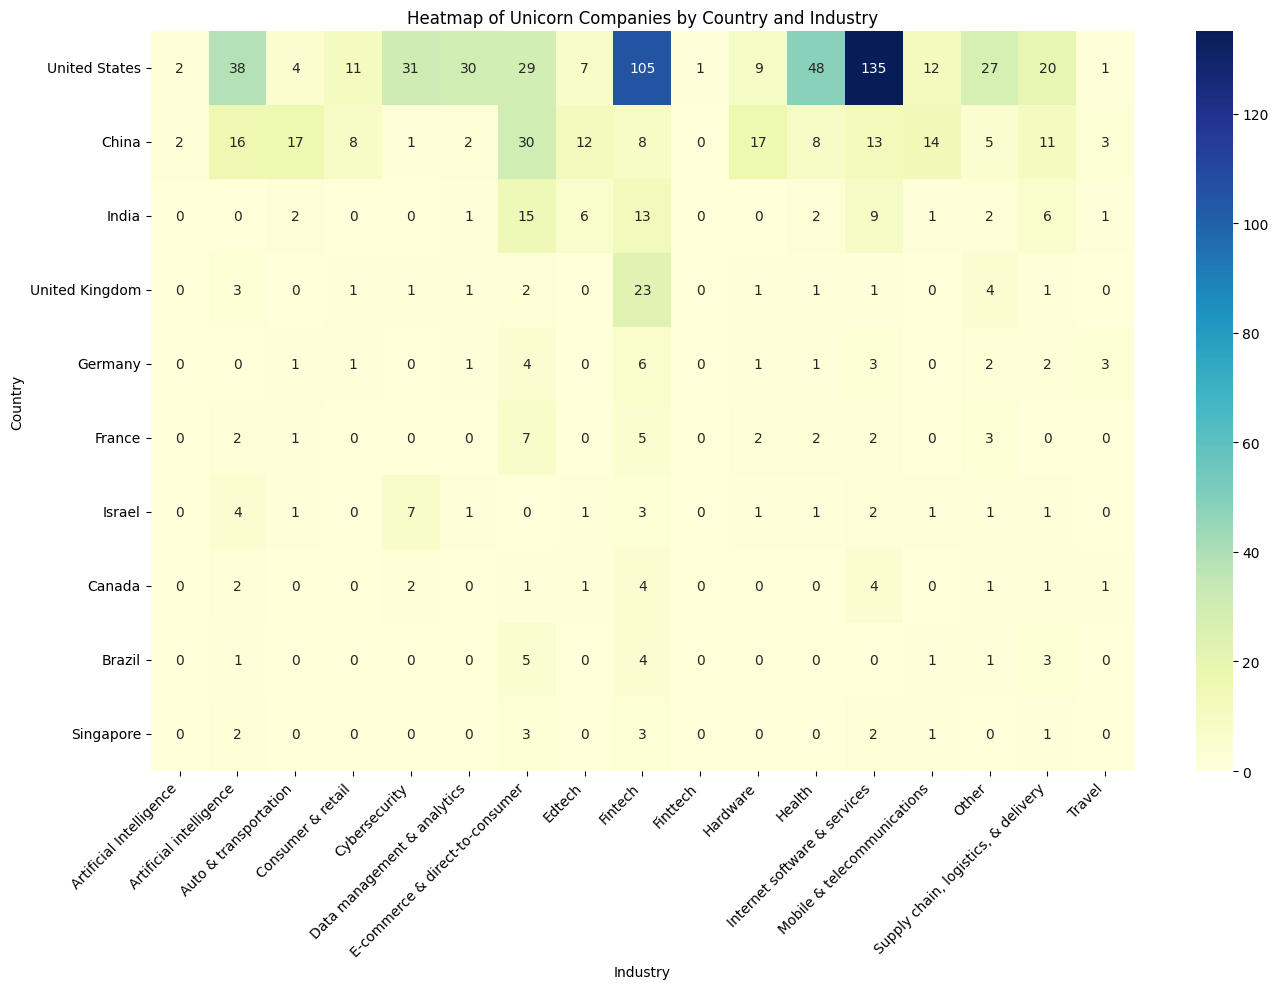

In [51]:
pivot_table = df.pivot_table(index='Country', columns='Industry', aggfunc='size', fill_value=0)

top_countries = df['Country'].value_counts().head(10).index
filtered_pivot_table = pivot_table.loc[top_countries]

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_pivot_table, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Unicorn Companies by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
#Using these heatmap we can think what industries bring most money in what countries

<Figure size 1400x800 with 0 Axes>

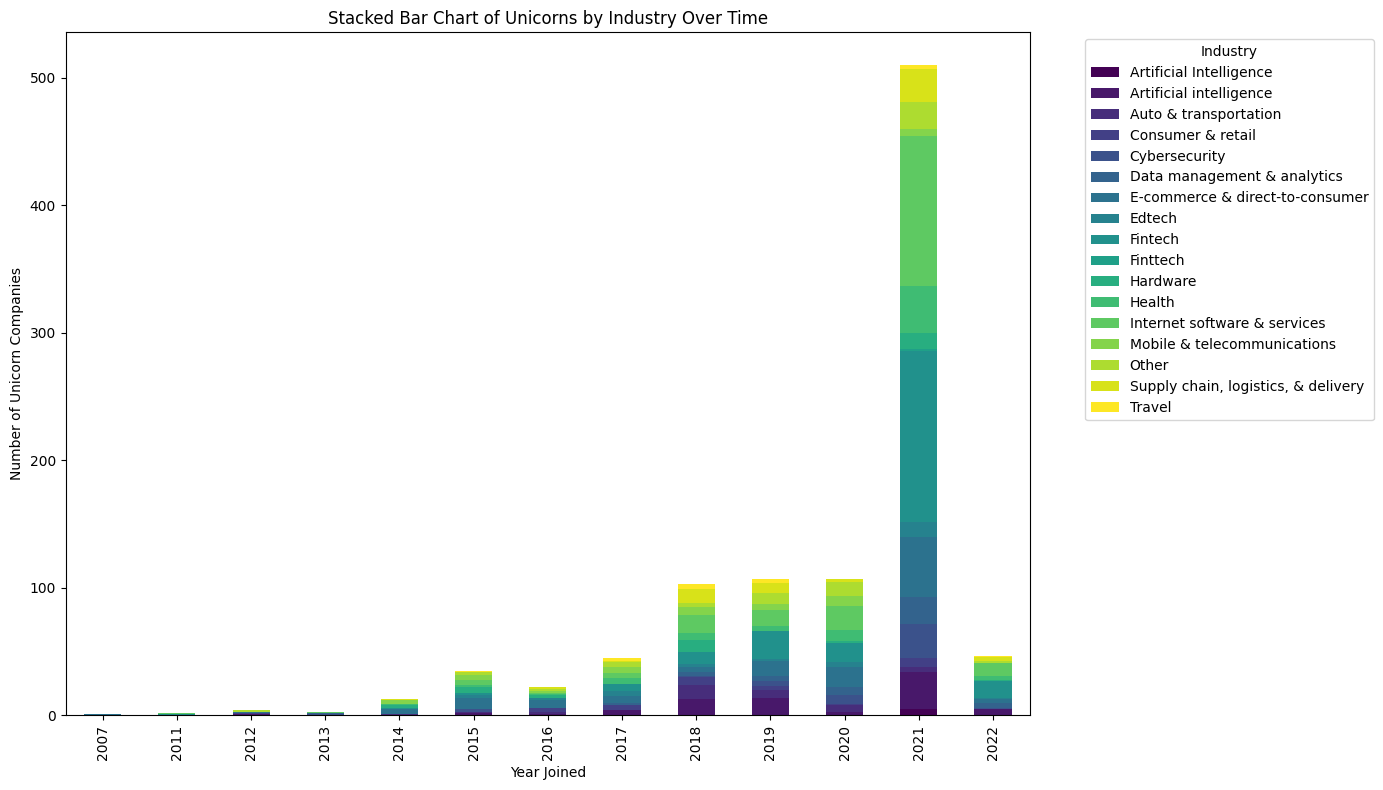

In [53]:
grouped_data = df.groupby(['Year Joined', 'Industry']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Stacked Bar Chart of Unicorns by Industry Over Time')
plt.xlabel('Year Joined')
plt.ylabel('Number of Unicorn Companies')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#This is a simple comparison between the number of companies in different idustries at different times

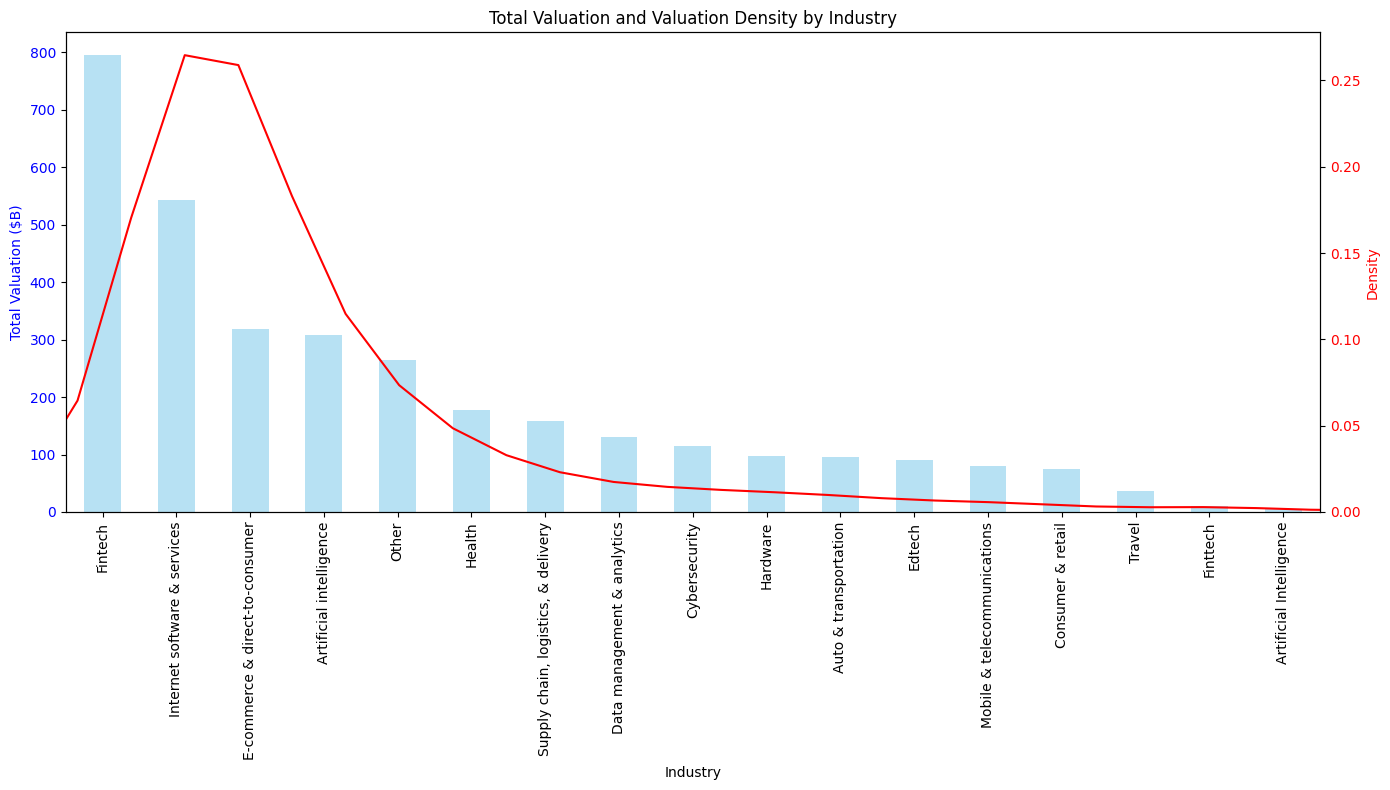

In [54]:
industry_valuation_sum = df.groupby('Industry')['Valuation ($B)'].sum().sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

industry_valuation_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.6)
ax1.set_ylabel('Total Valuation ($B)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Total Valuation and Valuation Density by Industry')

ax2 = ax1.twinx()
sns.kdeplot(df['Valuation ($B)'], ax=ax2, color='red', bw_adjust=0.5)
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()
